# Danh sách thành viên:
#### Võ Quốc Thái - 52000398
#### Nguyễn Tấn Phát - 52000583
#### Trương Thị Bích Trinh - 52000424

## 1)	Phân tích thống kê trên dữ liệu, vẽ các đồ thị

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(filename)
df.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [4]:
# Kiểm tra tên của các cột
names = list(df.columns)
# Kiểm tra loại của các cột
types = df.dtypes
# Kết hợp tất cả dữ liệu với nhau theo một định dạng thống nhất
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(len(types)):
    if types[i]=='object':
        le.fit_transform(df[names[i]])
        df[names[i]] = le.transform(df[names[i]])
data = df.drop(['customerID'], axis=1)

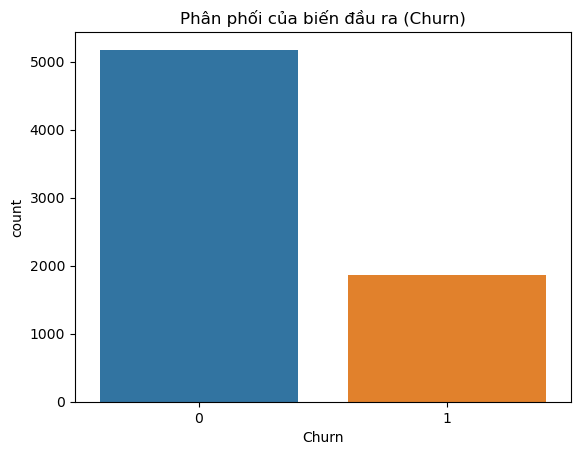

In [5]:
# Vẽ đồ thị phân phối của biến đầu ra (Churn)
sns.countplot(x='Churn', data=data)
plt.title('Phân phối của biến đầu ra (Churn)')
plt.show()

In [6]:
X_c = data.drop(['Churn'], axis=1)
y_c = data['Churn']
print(X_c.shape)
print(y_c.shape)

(7043, 19)
(7043,)


In [7]:
count_class_0, count_class_1 = y_c.value_counts()
print("Số lượng không từ bỏ dịch vụ (Churn = 0):", count_class_0)
print("Số lượng từ bỏ dịch vụ (Churn = 1):", count_class_1)

Số lượng không từ bỏ dịch vụ (Churn = 0): 5174
Số lượng từ bỏ dịch vụ (Churn = 1): 1869


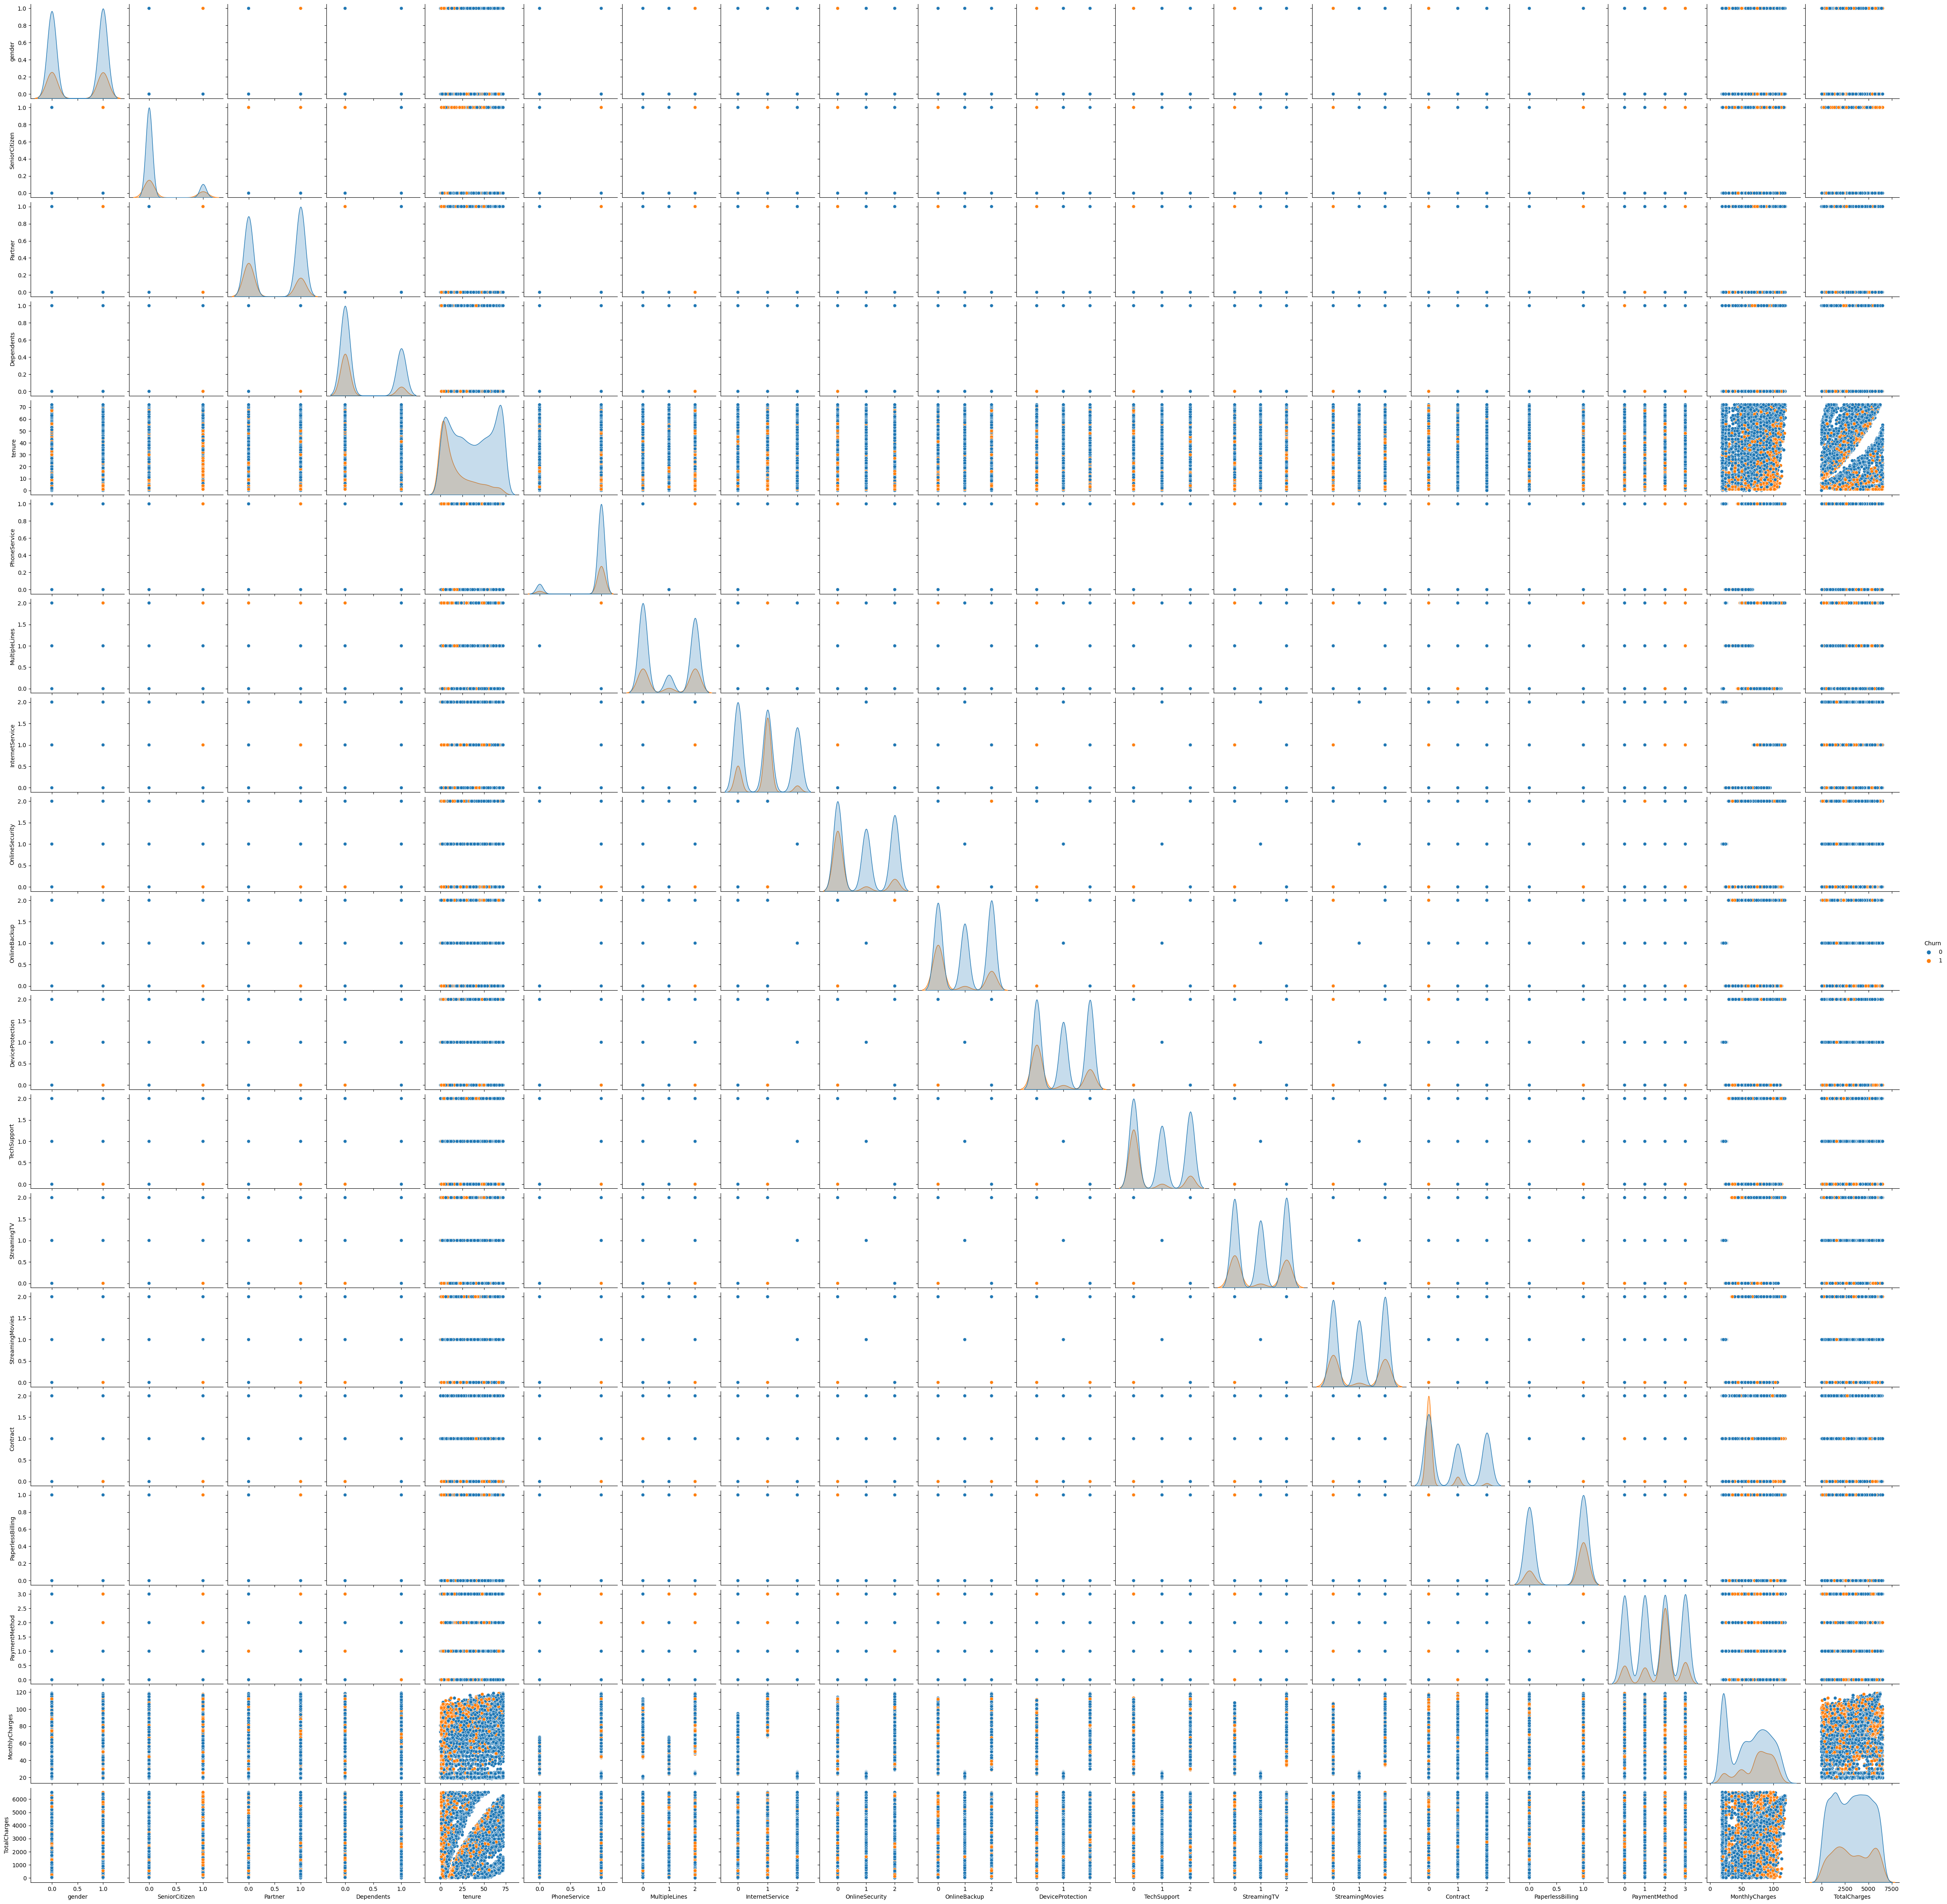

In [8]:
# Vẽ biểu đồ pairplot để xem mối quan hệ giữa các đặc trưng
sns.pairplot(data, hue="Churn")
plt.show()

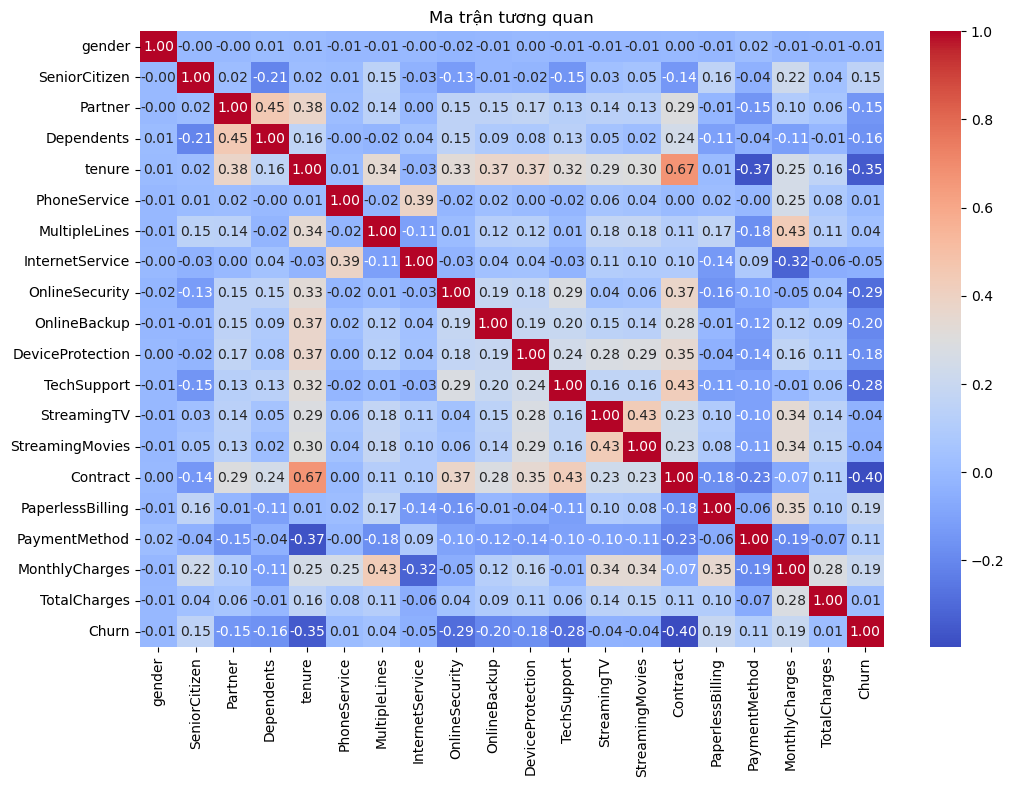

In [9]:
# Vẽ đồ thị tương quan giữa các biến số
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan')
plt.show()

In [10]:
# Thực hiện cân bằng dữ liệu
data_class_0 = data[data['Churn']==0]
data_class_1 = data[data['Churn']==1]
data_class_0_under = data_class_0.sample(count_class_1)
data_under = pd.concat([data_class_0_under, data_class_1], axis = 0)

X = data_under.drop(['Churn'], axis=1)
y = data_under['Churn']
print(X.shape)
print(y.shape)

(3738, 19)
(3738,)


Text(0.5, 1.0, 'Distribution of Churn (Undersampled)')

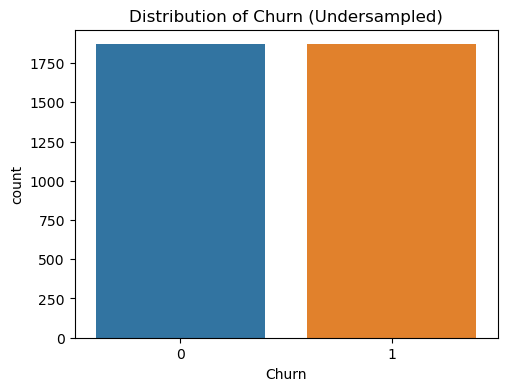

In [11]:
# biểu đồ sau khi cân bằng
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Churn', data=pd.concat([X, y], axis=1))
plt.title('Distribution of Churn (Undersampled)')

In [12]:
# Tách tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)

In [14]:
print(X_scaler[0])
print(data.head())

[1.         0.         0.         0.         0.69444444 1.
 1.         1.         0.5        0.5        0.5        0.5
 0.5        0.5        1.         0.         0.         0.06221776
 0.0555981 ]
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1      

In [15]:
print("Kích thước của df trước khi loại bỏ giá trị ngoại lai:", df.shape)
#Loại bỏ các giá trị ngoại lai
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
Q1 = data_under.quantile(0.25)
Q3 = data_under.quantile(0.75)
IQR = Q3 - Q1
data_under = data_under[~((data_under < (Q1 - 1.5 * IQR)) | (data_under > (Q3 + 1.5 * IQR))).any(axis=1)]
data_no_outliers = data_under[~((data_under < (Q1 - 1.5 * IQR)) | (data_under > (Q3 + 1.5 * IQR))).any(axis=1)]
X_scaled_data = pd.DataFrame(X_scaled, columns = X.columns)

print("Kích thước của df sau khi loại bỏ giá trị ngoại lai:", data_no_outliers.shape)

Kích thước của df trước khi loại bỏ giá trị ngoại lai: (7043, 21)
Kích thước của df sau khi loại bỏ giá trị ngoại lai: (2737, 20)


In [16]:
#Kiểm tra dữ liệu đã được chuẩn hóa chính xác
print("Means dữ liệu sau khi được chuẩn hóa : ",X_test.mean(axis=0))
print("\nStds dữ liệu sau khi được chuẩn hóa : ",X_test.std(axis=0))

Means dữ liệu sau khi được chuẩn hóa :  gender                 0.495544
SeniorCitizen          0.185383
Partner                0.460784
Dependents             0.273619
tenure                28.409091
PhoneService           0.896613
MultipleLines          0.976827
InternetService        0.852050
OnlineSecurity         0.662210
OnlineBackup           0.835116
DeviceProtection       0.827986
TechSupport            0.681818
StreamingTV            0.984848
StreamingMovies        0.977718
Contract               0.532086
PaperlessBilling       0.633690
PaymentMethod          1.604278
MonthlyCharges        67.711364
TotalCharges        3296.114082
dtype: float64

Stds dữ liệu sau khi được chuẩn hóa :  gender                 0.500203
SeniorCitizen          0.388781
Partner                0.498682
Dependents             0.446014
tenure                24.428147
PhoneService           0.304599
MultipleLines          0.947035
InternetService        0.680715
OnlineSecurity         0.847401
OnlineBac

In [17]:
#Điền giá trị trung bình cho các cột bị thiếu
data_under.fillna(data_under.mean(), inplace=True)

In [18]:
#Xóa các feature có phương sai thấp
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_train = selector.fit_transform(X_train)
X_test = selector.transform(X_test)


Số lượng của các điểm dữ liệu : 2737


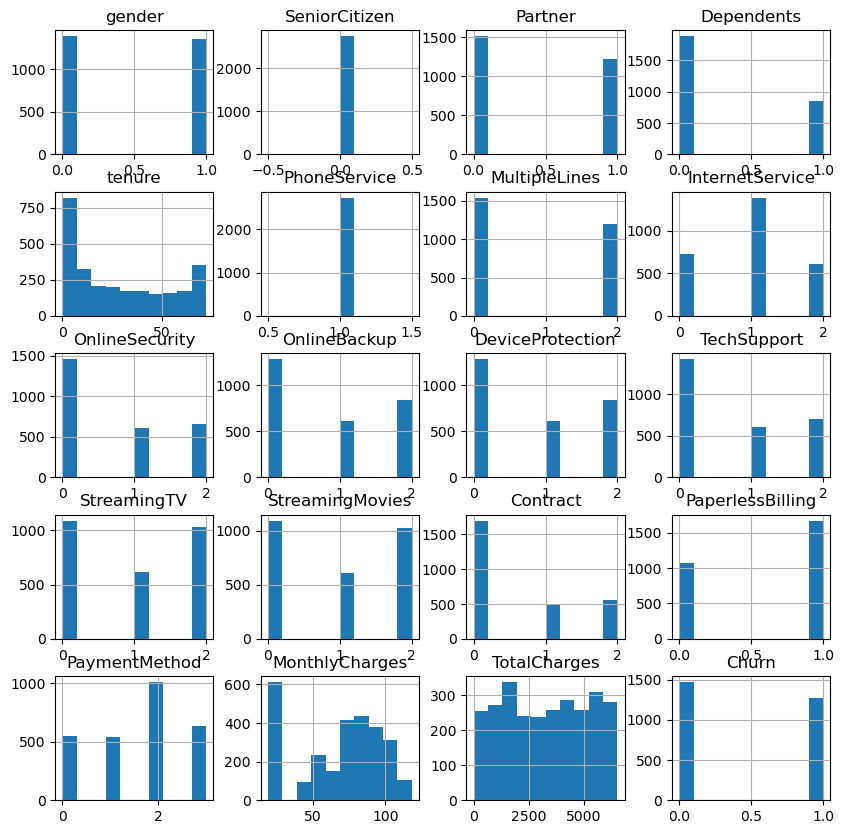

In [19]:
#Kiểm tra số lượng dữ liệu
print("\nSố lượng của các điểm dữ liệu :", len(data_under))
#Kiểm tra phân phối của các cột đặc trưng
import matplotlib.pyplot as plt
data_under.hist(figsize=(10,10))
plt.show()

## 2) Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
# Khởi tạo các mô hình
knn0 = KNeighborsClassifier(n_neighbors=5)
nb_models0 = [MultinomialNB(), GaussianNB()]
lr0 = LinearRegression()
dtc0 = DecisionTreeClassifier()
dtr0 = DecisionTreeRegressor()
ada_c0 = AdaBoostClassifier()
ada_r0 = AdaBoostRegressor()
gradient_c0 = GradientBoostingClassifier()
gradient_r0 = GradientBoostingRegressor()
xgbo_c0 = xgb.XGBClassifier()
xgbo_r0 =xgb.XGBRegressor()


*** AdaBoostClassifier (Classification) ***
Accuracy score: 0.7620
Confusion matrix:
[[415 163]
 [104 440]]
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       578
           1       0.73      0.81      0.77       544

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.77      0.76      0.76      1122



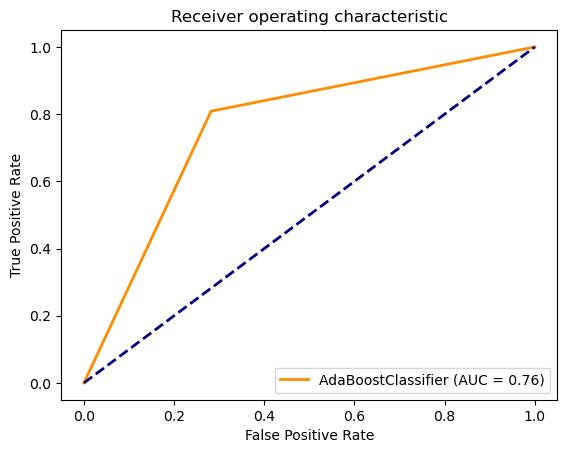


*** GradientBoostingClassifier (Classification) ***
Accuracy score: 0.7638
Confusion matrix:
[[419 159]
 [106 438]]
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       578
           1       0.73      0.81      0.77       544

    accuracy                           0.76      1122
   macro avg       0.77      0.77      0.76      1122
weighted avg       0.77      0.76      0.76      1122



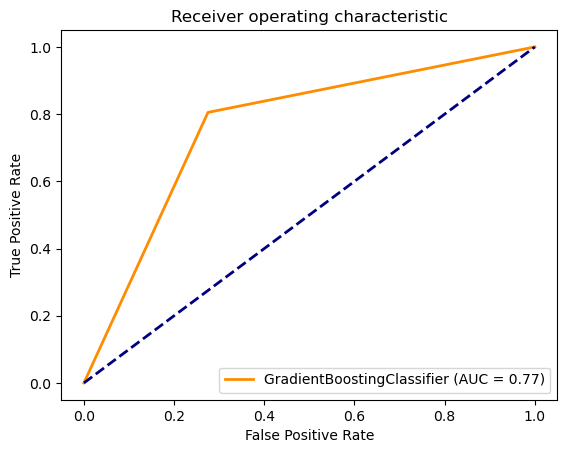


*** XGBClassifier (Classification) ***
Accuracy score: 0.7451
Confusion matrix:
[[421 157]
 [129 415]]
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       578
           1       0.73      0.76      0.74       544

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122



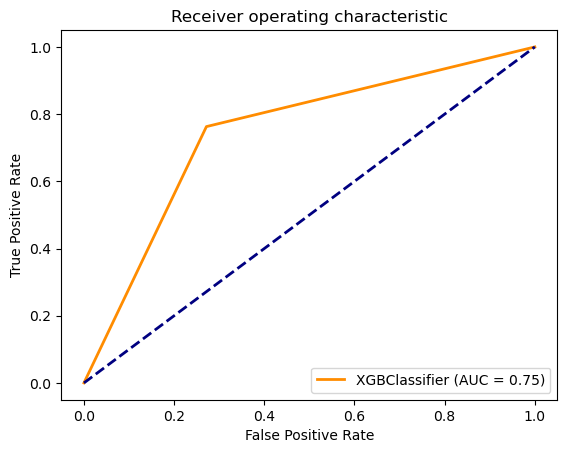


*** AdaBoostRegressor (Regression) ***
R2 score: 0.3163
Mean squared error: 0.1708
Mean absolute error: 0.3549
Root Mean squared error: 0.4132

*** GradientBoostingRegressor (Regression) ***
R2 score: 0.3356
Mean squared error: 0.1659
Mean absolute error: 0.3187
Root Mean squared error: 0.4074

*** XGBRegressor (Regression) ***
R2 score: 0.1992
Mean squared error: 0.2000
Mean absolute error: 0.3342
Root Mean squared error: 0.4472

*** KNeighborsClassifier (Classification) ***
Accuracy score: 0.6845
Confusion matrix:
[[385 193]
 [161 383]]
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       578
           1       0.66      0.70      0.68       544

    accuracy                           0.68      1122
   macro avg       0.69      0.69      0.68      1122
weighted avg       0.69      0.68      0.68      1122



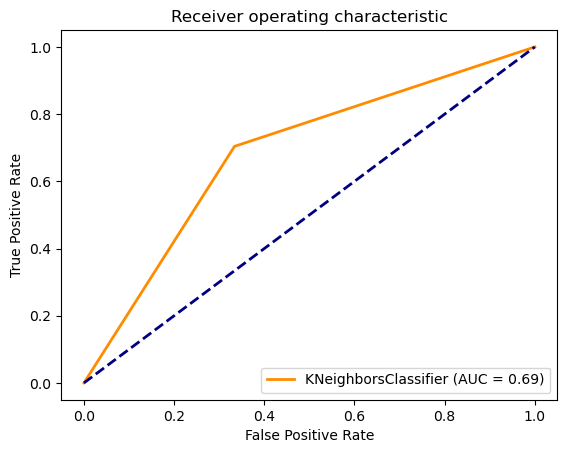


*** LinearRegression (Regression) ***
R2 score: 0.3293
Mean squared error: 0.1675
Mean absolute error: 0.3420
Root Mean squared error: 0.4093

*** DecisionTreeClassifier (Classification) ***
Accuracy score: 0.6800
Confusion matrix:
[[392 186]
 [173 371]]
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       578
           1       0.67      0.68      0.67       544

    accuracy                           0.68      1122
   macro avg       0.68      0.68      0.68      1122
weighted avg       0.68      0.68      0.68      1122



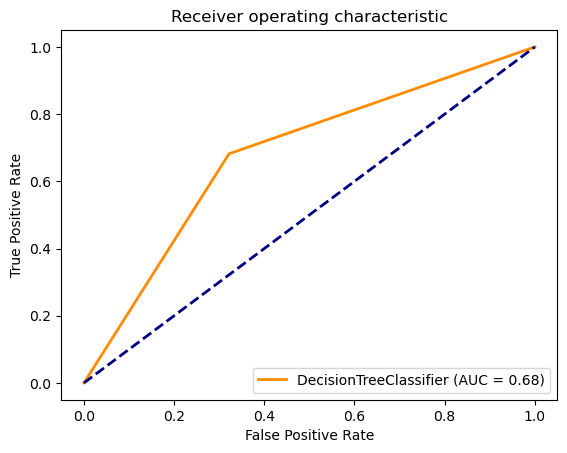


*** DecisionTreeRegressor (Regression) ***
R2 score: -0.2882
Mean squared error: 0.3217
Mean absolute error: 0.3226
Root Mean squared error: 0.5672

*** MultinomialNB (Classification) ***
Accuracy score: 0.7353
Confusion matrix:
[[429 149]
 [148 396]]
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       578
           1       0.73      0.73      0.73       544

    accuracy                           0.74      1122
   macro avg       0.74      0.74      0.74      1122
weighted avg       0.74      0.74      0.74      1122



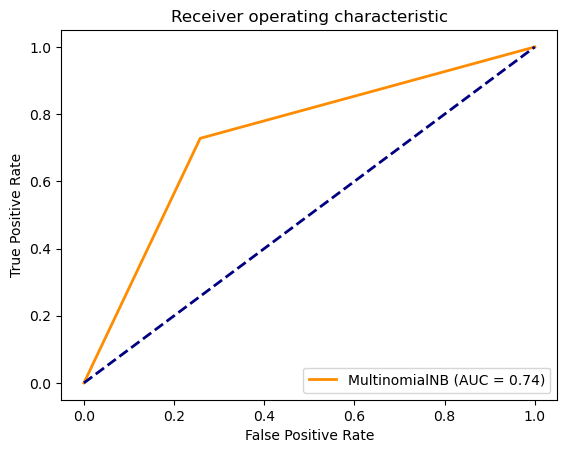


*** GaussianNB (Classification) ***
Accuracy score: 0.7442
Confusion matrix:
[[413 165]
 [122 422]]
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       578
           1       0.72      0.78      0.75       544

    accuracy                           0.74      1122
   macro avg       0.75      0.75      0.74      1122
weighted avg       0.75      0.74      0.74      1122



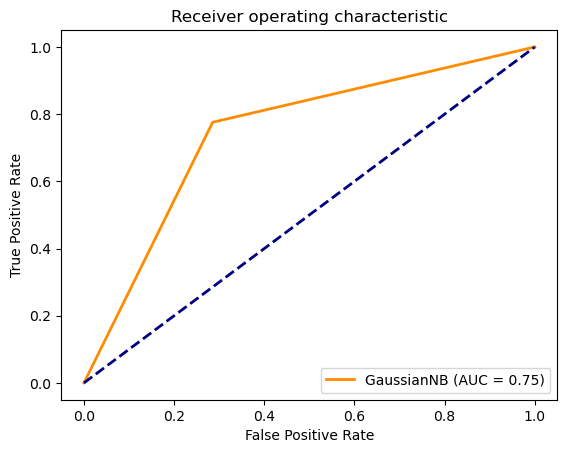

In [77]:
from sklearn.metrics import roc_curve, auc, r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import os 
from scipy import stats
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  precision_recall_curve

# Khởi tạo biến lưu giá trị AUC hoặc R2 score cho từng mô hình
auc_scores = []
r2_scores = []
metrics_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-score', 'Support'])
# Huấn luyện và đánh giá mô hình
for model in [ada_c0, gradient_c0, xgbo_c0, ada_r0, gradient_r0, xgbo_r0, knn0, lr0, dtc0, dtr0] + nb_models0:
    # Tách loại mô hình
    if model in [ada_c0, gradient_c0, xgbo_c0, knn0, dtc0] + nb_models0:
        problem_type = "Classification"
    else:
        problem_type = "Regression"
    print(f"\n*** {model.__class__.__name__} ({problem_type}) ***")
    
    # Huấn luyện mô hình trên tập train
    model.fit(X_train, y_train)
    
    # Đánh giá mô hình trên tập test
    if problem_type == "Classification": 
        y_pred = model.predict(X_test)
        print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
        print(f"Classification report:\n{classification_report(y_test, y_pred)}")

        
        # Tính AUC và lưu giá trị vào biến auc_scores
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        auc_scores.append(roc_auc)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()



        
    else: #Nếu là "Regression"
        y_pred = model.predict(X_test)
        print(f"R2 score: {r2_score(y_test, y_pred):.4f}")
        print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.4f}")
        print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred):.4f}")
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean squared error: {:.4f}".format(rmse))

## 3) Sử dụng Feed Forward Neural Network và Reccurent Neural Network¶

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN 
# Khởi tạo mô hình Feed Forward Neural Network 
ffnn0 = Sequential()
ffnn0.add(Dense(12, input_shape=(19,), activation='relu'))
ffnn0.add(Dense(8, activation='relu'))
ffnn0.add(Dense(1, activation='sigmoid'))
ffnn0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
ffnn0.fit(X_train, y_train, epochs=5, batch_size=10, validation_split=0.2)

Epoch 1/5
210/210 [==============================] - 3s 3ms/step - loss: 173.3250 - accuracy: 0.5263 - val_loss: 0.7463 - val_accuracy: 0.6240
Epoch 2/5
210/210 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6534 - val_loss: 0.5144 - val_accuracy: 0.7634
Epoch 3/5
210/210 [==============================] - 1s 3ms/step - loss: 0.6125 - accuracy: 0.6941 - val_loss: 0.5533 - val_accuracy: 0.7653
Epoch 4/5
210/210 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6960 - val_loss: 0.5861 - val_accuracy: 0.7156
Epoch 5/5
210/210 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6902 - val_loss: 1.3505 - val_accuracy: 0.5916


In [24]:
history1 = ffnn0.fit(X_test, y_test, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
29/29 [==============================] - 0s 4ms/step - loss: 0.7193 - accuracy: 0.6823 - val_loss: 0.6026 - val_accuracy: 0.7067
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.7458 - val_loss: 0.6294 - val_accuracy: 0.6933
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.7324 - val_loss: 0.5888 - val_accuracy: 0.7067
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.7581 - val_loss: 0.6450 - val_accuracy: 0.6844
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6010 - accuracy: 0.7157 - val_loss: 1.3292 - val_accuracy: 0.5600
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.8797 - accuracy: 0.6533 - val_loss: 0.7778 - val_accuracy: 0.6044
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.7603 - val_loss: 0.6016 - val_accuracy: 0.7067
Epoch 8/10
29/29 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


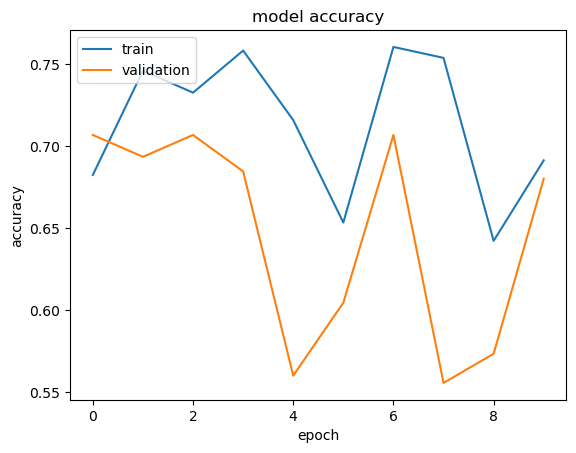

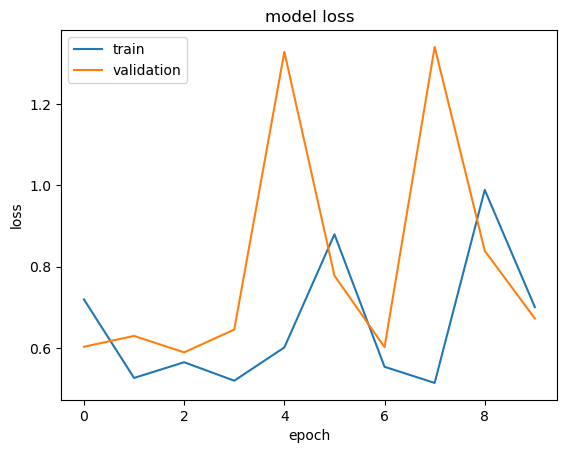

In [25]:
import keras
from matplotlib import pyplot as plt
print(history1.history.keys())
#  "Accuracy"
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
test_loss, test_acc = ffnn0.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

36/36 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.7273
Test accuracy: 72.73%


In [27]:
# Khởi tạo mô hình Reccurent Neural Network 
rnn0 = Sequential()
rnn0.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
rnn0.add(SimpleRNN(units = 50, return_sequences = False))
rnn0.add(Dense(units = 1))
rnn0.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [28]:
rnn0.fit(X_train, y_train, epochs = 5, batch_size = 64, validation_split=0.2)

Epoch 1/5
33/33 [==============================] - 3s 17ms/step - loss: 0.2339 - accuracy: 0.6716 - val_loss: 0.1745 - val_accuracy: 0.7519
Epoch 2/5
33/33 [==============================] - 0s 8ms/step - loss: 0.1688 - accuracy: 0.7490 - val_loss: 0.1654 - val_accuracy: 0.7538
Epoch 3/5
33/33 [==============================] - 0s 9ms/step - loss: 0.1607 - accuracy: 0.7620 - val_loss: 0.1648 - val_accuracy: 0.7538
Epoch 4/5
33/33 [==============================] - 0s 8ms/step - loss: 0.1614 - accuracy: 0.7605 - val_loss: 0.1814 - val_accuracy: 0.7519
Epoch 5/5
33/33 [==============================] - 0s 8ms/step - loss: 0.1671 - accuracy: 0.7495 - val_loss: 0.1613 - val_accuracy: 0.7538


In [29]:
history2 = rnn0.fit(X_test, y_test, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
29/29 [==============================] - 0s 9ms/step - loss: 0.1715 - accuracy: 0.7592 - val_loss: 0.2245 - val_accuracy: 0.6756
Epoch 2/10
29/29 [==============================] - 0s 8ms/step - loss: 0.1703 - accuracy: 0.7536 - val_loss: 0.1903 - val_accuracy: 0.7244
Epoch 3/10
29/29 [==============================] - 0s 8ms/step - loss: 0.1699 - accuracy: 0.7480 - val_loss: 0.2074 - val_accuracy: 0.6889
Epoch 4/10
29/29 [==============================] - 0s 7ms/step - loss: 0.1837 - accuracy: 0.7269 - val_loss: 0.2171 - val_accuracy: 0.6844
Epoch 5/10
29/29 [==============================] - 0s 8ms/step - loss: 0.1941 - accuracy: 0.6945 - val_loss: 0.2051 - val_accuracy: 0.7067
Epoch 6/10
29/29 [==============================] - 0s 7ms/step - loss: 0.1574 - accuracy: 0.7703 - val_loss: 0.1933 - val_accuracy: 0.7289
Epoch 7/10
29/29 [==============================] - 0s 8ms/step - loss: 0.1590 - accuracy: 0.7692 - val_loss: 0.1964 - val_accuracy: 0.7200
Epoch 8/10
29/29 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


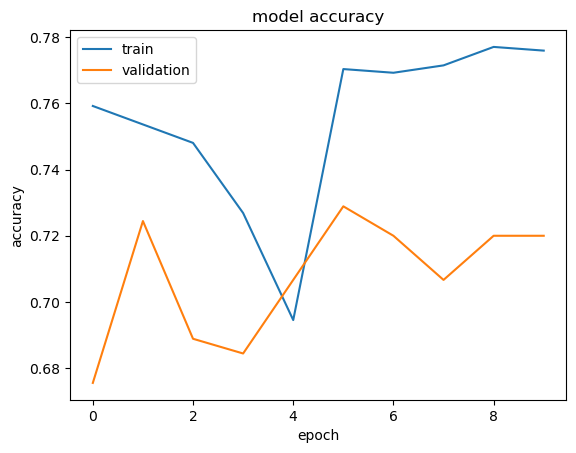

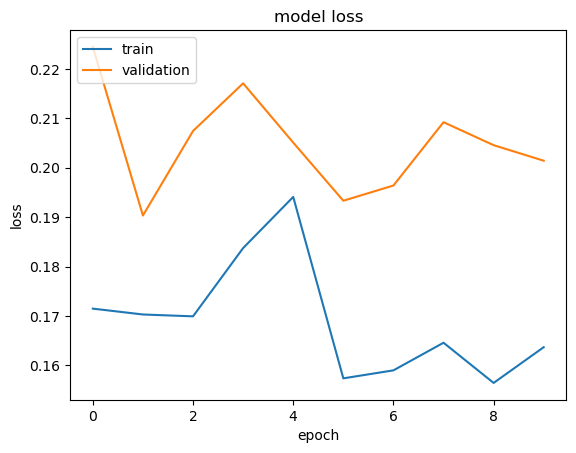

In [30]:
import keras
from matplotlib import pyplot as plt
print(history2.history.keys())
#  "Accuracy"
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [60]:
test_loss, test_acc = rnn0.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

36/36 [==============================] - 0s 4ms/step - loss: 0.1627 - accuracy: 0.7665
Test accuracy: 76.65%


## 4) Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán

### Cross-validation để chọn giá trị k tốt nhất để tránh overfitting cho KNN

In [31]:
from sklearn.model_selection import GridSearchCV
# Sử dụng GridSearchCV để tìm giá trị k tốt nhất
param_grid = {'n_neighbors': range(1, 21)}
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# In giá trị k tốt nhất
print("Best k:", grid_search.best_params_['n_neighbors'])

Best k: 7


In [32]:
from sklearn.ensemble import BaggingClassifier
# Khởi tạo mô hình
knn_1 = KNeighborsClassifier(n_neighbors = 10)
# Sử dụng Bagging với kNN
knn = BaggingClassifier(estimator=knn_1, n_estimators=10, random_state=42)

### Sử dụng regularization L2 để giảm trọng số để tránh overfitting cho Linear Regression

In [33]:
from sklearn.linear_model import Ridge
alpha = 1.0

# Khởi tạo mô hình
lr = Ridge(alpha=alpha)

### Sử dụng phương pháp giới hạn Độ Sâu (Max Depth) để tránh overfitting cho Decission Tree

In [34]:
# Khởi tạo các mô hình
dtc = DecisionTreeClassifier(max_depth=5)
dtr = DecisionTreeRegressor(max_depth=5)

In [35]:
nb_models = [MultinomialNB(), GaussianNB()]

### Sử dụng phương pháp giới hạn Độ Sâu (Max Depth) và kiểm soát Learning Rate để tránh overfitting cho các mô hình Ensemble Learning¶

In [78]:
# Khởi tạo các mô hình
ada_c = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.2)
ada_r = AdaBoostRegressor()
gradient_c = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.2, max_depth = 5)
gradient_r = GradientBoostingRegressor()
xgbo_c = xgb.XGBClassifier(n_estimators = 200, learning_rate = 0.2, max_depth = 5)
xgbo_r =xgb.XGBRegressor()


*** AdaBoostClassifier (Classification) ***
Accuracy score: 0.7602
Confusion matrix:
[[409 169]
 [100 444]]
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       578
           1       0.72      0.82      0.77       544

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.77      0.76      0.76      1122



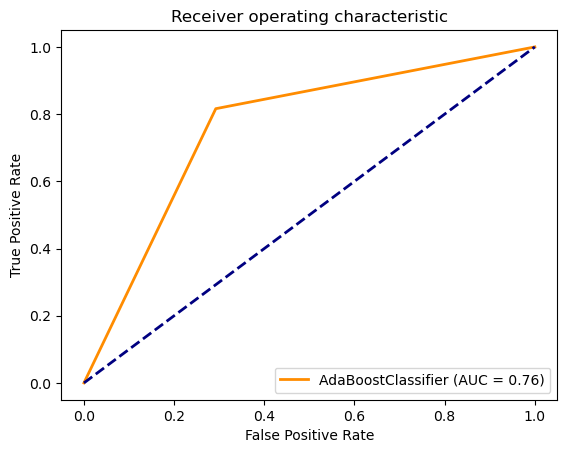


*** GradientBoostingClassifier (Classification) ***
Accuracy score: 0.7353
Confusion matrix:
[[413 165]
 [132 412]]
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       578
           1       0.71      0.76      0.74       544

    accuracy                           0.74      1122
   macro avg       0.74      0.74      0.74      1122
weighted avg       0.74      0.74      0.74      1122



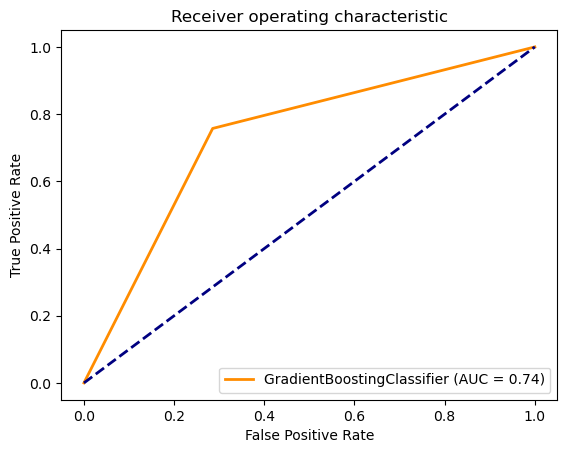


*** XGBClassifier (Classification) ***
Accuracy score: 0.7531
Confusion matrix:
[[420 158]
 [119 425]]
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       578
           1       0.73      0.78      0.75       544

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122



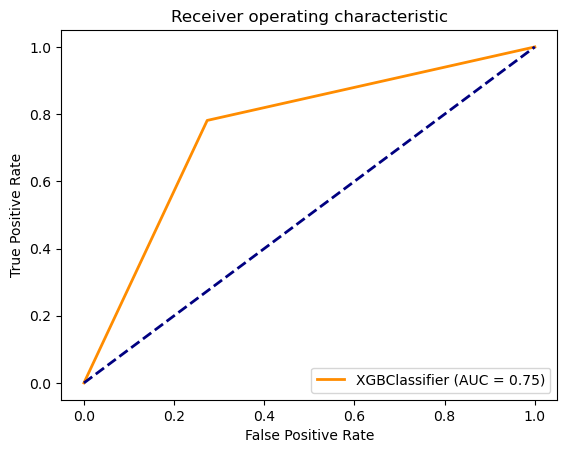


*** AdaBoostRegressor (Regression) ***
R2 score: 0.3042
Mean squared error: 0.1738
Mean absolute error: 0.3755
Root Mean squared error: 0.4169

*** GradientBoostingRegressor (Regression) ***
R2 score: 0.3357
Mean squared error: 0.1659
Mean absolute error: 0.3186
Root Mean squared error: 0.4073

*** XGBRegressor (Regression) ***
R2 score: 0.1992
Mean squared error: 0.2000
Mean absolute error: 0.3342
Root Mean squared error: 0.4472

*** BaggingClassifier (Classification) ***
Accuracy score: 0.6863
Confusion matrix:
[[388 190]
 [162 382]]
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       578
           1       0.67      0.70      0.68       544

    accuracy                           0.69      1122
   macro avg       0.69      0.69      0.69      1122
weighted avg       0.69      0.69      0.69      1122



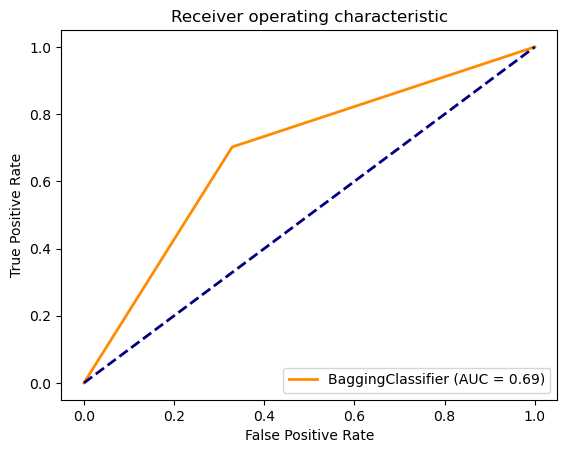


*** Ridge (Regression) ***
R2 score: 0.3293
Mean squared error: 0.1675
Mean absolute error: 0.3421
Root Mean squared error: 0.4093

*** DecisionTreeClassifier (Classification) ***
Accuracy score: 0.7353
Confusion matrix:
[[407 171]
 [126 418]]
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       578
           1       0.71      0.77      0.74       544

    accuracy                           0.74      1122
   macro avg       0.74      0.74      0.74      1122
weighted avg       0.74      0.74      0.74      1122



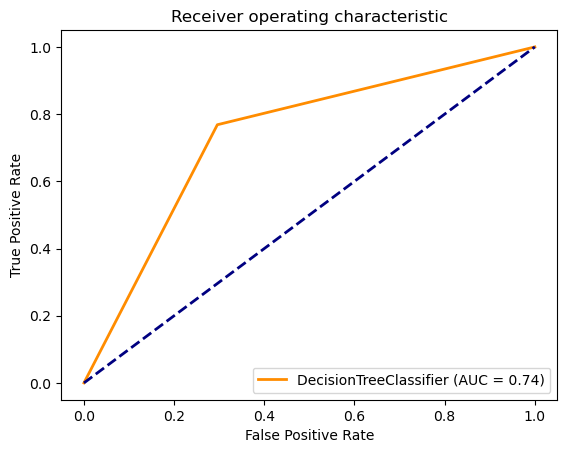


*** DecisionTreeRegressor (Regression) ***
R2 score: 0.2685
Mean squared error: 0.1827
Mean absolute error: 0.3287
Root Mean squared error: 0.4274

*** MultinomialNB (Classification) ***
Accuracy score: 0.7353
Confusion matrix:
[[429 149]
 [148 396]]
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       578
           1       0.73      0.73      0.73       544

    accuracy                           0.74      1122
   macro avg       0.74      0.74      0.74      1122
weighted avg       0.74      0.74      0.74      1122



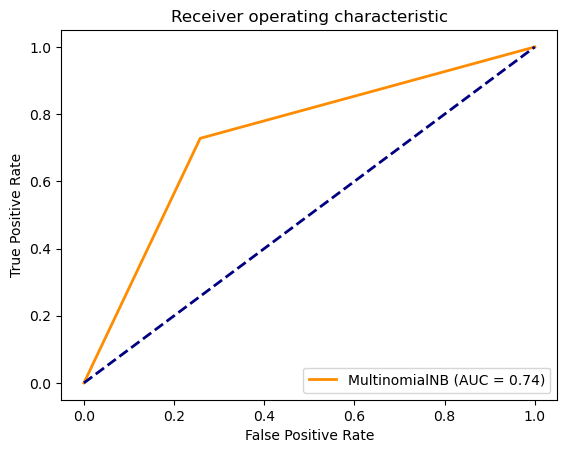


*** GaussianNB (Classification) ***
Accuracy score: 0.7442
Confusion matrix:
[[413 165]
 [122 422]]
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       578
           1       0.72      0.78      0.75       544

    accuracy                           0.74      1122
   macro avg       0.75      0.75      0.74      1122
weighted avg       0.75      0.74      0.74      1122



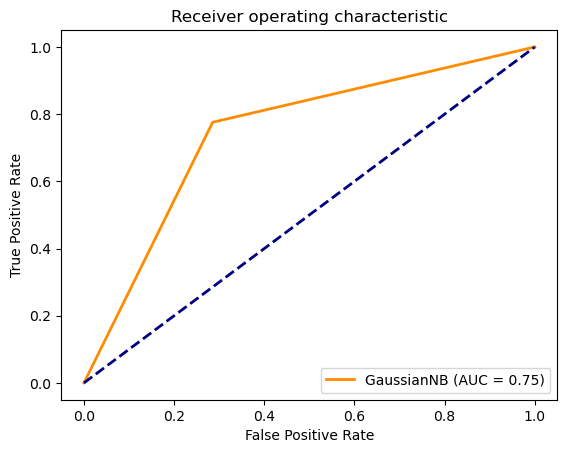

In [79]:
# Khởi tạo biến lưu giá trị AUC hoặc R2 score cho từng mô hình
auc_scores = []
r2_scores = []
metrics_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-score', 'Support'])
# Huấn luyện và đánh giá mô hình
for model in [ada_c, gradient_c, xgbo_c, ada_r, gradient_r, xgbo_r, knn, lr, dtc, dtr] + nb_models:
    # Tách loại mô hình
    if model in [ada_c, gradient_c, xgbo_c, knn, dtc] + nb_models:
        problem_type = "Classification"
    else:
        problem_type = "Regression"
    print(f"\n*** {model.__class__.__name__} ({problem_type}) ***")
    
    # Huấn luyện mô hình trên tập train
    model.fit(X_train, y_train)
    
    # Đánh giá mô hình trên tập test
    if problem_type == "Classification": 
        y_pred = model.predict(X_test)
        print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
        print(f"Classification report:\n{classification_report(y_test, y_pred)}")

        
        # Tính AUC và lưu giá trị vào biến auc_scores
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        auc_scores.append(roc_auc)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()



        
    else: #Nếu là "Regression"
        y_pred = model.predict(X_test)
        print(f"R2 score: {r2_score(y_test, y_pred):.4f}")
        print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.4f}")
        print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred):.4f}")
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean squared error: {:.4f}".format(rmse))

### Sử dụng lớp Dropout và EarlyStopping callback để tránh overfitting cho Feed Forward Neural Network

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN 
from tensorflow.keras.layers import Dropout

ffnn = Sequential()
ffnn.add(Dense(12, input_shape=(19,), activation='relu'))
Dropout(0.5) #Thêm lớp Dropout để ngẫu nhiên "tắt" một số nơ-ron trong quá trình huấn luyện.
ffnn.add(Dense(8, activation='relu'))
Dropout(0.5)
ffnn.add(Dense(1, activation='sigmoid'))
ffnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

# Sử dụng EarlyStopping callback để dừng quá trình huấn luyện khi hiện tượng overfitting bắt đầu xuất hiện trên tập validation
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
ffnn.fit(X_train, y_train, epochs=5, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/5
210/210 [==============================] - 1s 3ms/step - loss: 33.0565 - accuracy: 0.4130 - val_loss: 3.4454 - val_accuracy: 0.5172
Epoch 2/5
210/210 [==============================] - 0s 2ms/step - loss: 1.5289 - accuracy: 0.5550 - val_loss: 0.8689 - val_accuracy: 0.6317
Epoch 3/5
210/210 [==============================] - 1s 3ms/step - loss: 0.7149 - accuracy: 0.6912 - val_loss: 0.7584 - val_accuracy: 0.6775
Epoch 4/5
210/210 [==============================] - 0s 2ms/step - loss: 0.8169 - accuracy: 0.6879 - val_loss: 0.5881 - val_accuracy: 0.7424
Epoch 5/5
210/210 [==============================] - 0s 2ms/step - loss: 0.7266 - accuracy: 0.7065 - val_loss: 0.6356 - val_accuracy: 0.7385


In [40]:
history3 = ffnn.fit(X_test, y_test, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
29/29 [==============================] - 0s 5ms/step - loss: 0.6970 - accuracy: 0.7202 - val_loss: 0.6400 - val_accuracy: 0.6889
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.7514 - val_loss: 0.6298 - val_accuracy: 0.7111
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.7492 - val_loss: 0.6464 - val_accuracy: 0.7067
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6505 - accuracy: 0.7280 - val_loss: 0.6748 - val_accuracy: 0.7022
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6234 - accuracy: 0.7213 - val_loss: 1.1676 - val_accuracy: 0.5733
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.7191 - val_loss: 1.6107 - val_accuracy: 0.5378
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.8844 - accuracy: 0.6711 - val_loss: 0.7941 - val_accuracy: 0.6622
Epoch 8/10
29/29 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


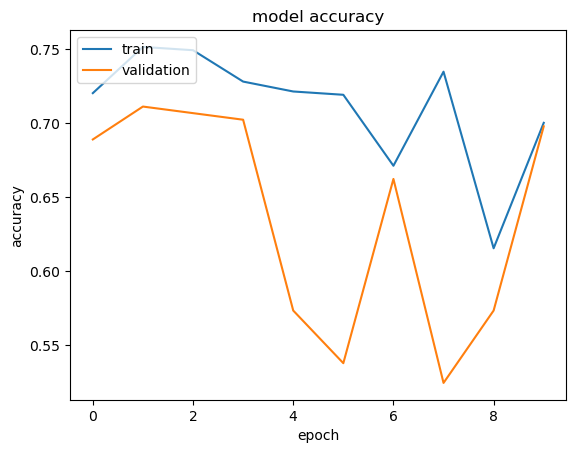

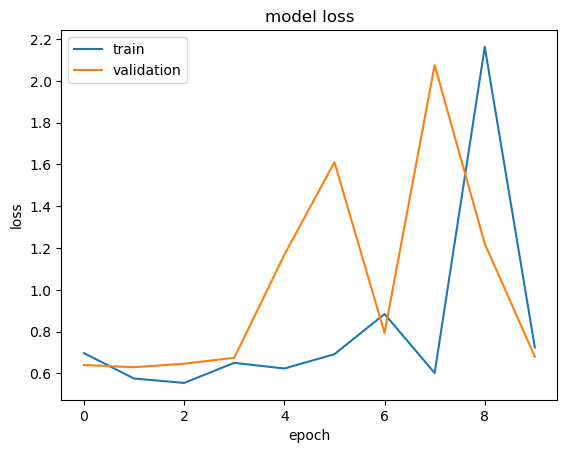

In [41]:
import keras
from matplotlib import pyplot as plt
print(history1.history.keys())
#  "Accuracy"
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
test_loss, test_acc = ffnn.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

36/36 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.7460
Test accuracy: 74.60%


### Sử dụng EarlyStopping callback và Gradient Clipping để tránh overfitting cho Reccurent Neural Network

In [43]:
from tensorflow.keras.optimizers import SGD

rnn = Sequential()
rnn.add(SimpleRNN(units = 50, return_sequences = True, 
                        input_shape = (X_train.shape[1], 1)))

rnn.add(SimpleRNN(units = 50, return_sequences = False))
rnn.add(Dense(units = 1))

optimizer = SGD(clipvalue=0.5)
rnn.compile(optimizer=optimizer, loss = 'mean_squared_error', metrics=['accuracy'])

In [44]:
# Train the model

early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=3)
rnn.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_split=0.2, callbacks=[early_stopping_rnn])

Epoch 1/10
33/33 [==============================] - 2s 16ms/step - loss: 0.3577 - accuracy: 0.6276 - val_loss: 0.2018 - val_accuracy: 0.7004
Epoch 2/10
33/33 [==============================] - 0s 8ms/step - loss: 0.1920 - accuracy: 0.7146 - val_loss: 0.1866 - val_accuracy: 0.7424
Epoch 3/10
33/33 [==============================] - 0s 7ms/step - loss: 0.1905 - accuracy: 0.7318 - val_loss: 0.1787 - val_accuracy: 0.7347
Epoch 4/10
33/33 [==============================] - 0s 8ms/step - loss: 0.1815 - accuracy: 0.7385 - val_loss: 0.1805 - val_accuracy: 0.7443
Epoch 5/10
33/33 [==============================] - 0s 8ms/step - loss: 0.1740 - accuracy: 0.7471 - val_loss: 0.1742 - val_accuracy: 0.7519
Epoch 6/10
33/33 [==============================] - 0s 7ms/step - loss: 0.1704 - accuracy: 0.7333 - val_loss: 0.1729 - val_accuracy: 0.7385
Epoch 7/10
33/33 [==============================] - 0s 8ms/step - loss: 0.1687 - accuracy: 0.7514 - val_loss: 0.1784 - val_accuracy: 0.7366
Epoch 8/10
33/33 [=

In [45]:
history4 = rnn.fit(X_test, y_test, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
29/29 [==============================] - 0s 8ms/step - loss: 0.1766 - accuracy: 0.7391 - val_loss: 0.3303 - val_accuracy: 0.6222
Epoch 2/10
29/29 [==============================] - 0s 8ms/step - loss: 0.1878 - accuracy: 0.7358 - val_loss: 0.2740 - val_accuracy: 0.6756
Epoch 3/10
29/29 [==============================] - 0s 8ms/step - loss: 0.1767 - accuracy: 0.7358 - val_loss: 0.2240 - val_accuracy: 0.6889
Epoch 4/10
29/29 [==============================] - 0s 8ms/step - loss: 0.1770 - accuracy: 0.7380 - val_loss: 0.6876 - val_accuracy: 0.5289
Epoch 5/10
29/29 [==============================] - 0s 7ms/step - loss: 0.1776 - accuracy: 0.7503 - val_loss: 0.4263 - val_accuracy: 0.5644
Epoch 6/10
29/29 [==============================] - 0s 7ms/step - loss: 0.1776 - accuracy: 0.7425 - val_loss: 0.3597 - val_accuracy: 0.5778
Epoch 7/10
29/29 [==============================] - 0s 8ms/step - loss: 0.1809 - accuracy: 0.7369 - val_loss: 0.3157 - val_accuracy: 0.6133
Epoch 8/10
29/29 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


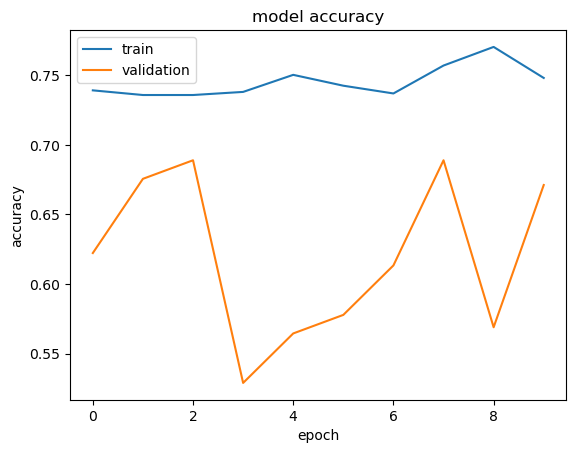

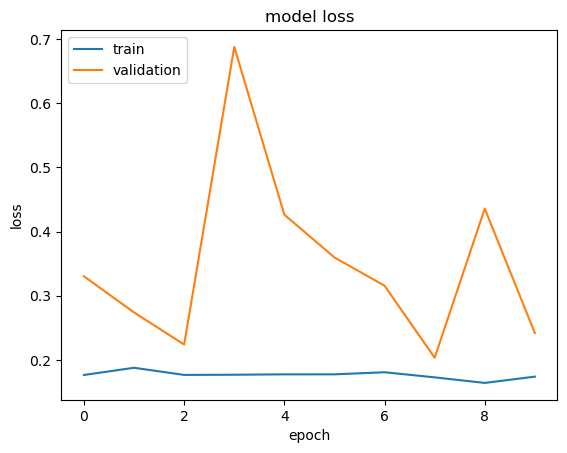

In [46]:
import keras
from matplotlib import pyplot as plt
print(history4.history.keys())
#  "Accuracy"
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [47]:
test_loss, test_acc = rnn.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

36/36 [==============================] - 0s 3ms/step - loss: 0.2006 - accuracy: 0.7148
Test accuracy: 71.48%


## 5) Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không.

- Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó:
    + Sử dụng kỹ thuật cross-validation để đánh giá hiệu suất của mô hình trên nhiều tập dữ liệu khác nhau.
    + Sử dụng kỹ thuật tinh chỉnh siêu tham số bằng cách sử dụng tìm kiếm lưới (Grid Search) hoặc tìm kiếm ngẫu nhiên (Random Search).
    + Sử dụng các kỹ thuật như L1 hoặc L2 regularization để kiểm soát overfitting và cải thiện tổng quát hóa.
    + Thêm các lớp vào các mô hình
    + Kết hợp nhiều mô hình để cung cấp dự đoán tốt hơn.

### Tinh tỉnh lại tham số của mô hình K-NN và mô hình AdaBoot

In [74]:
# Khởi tạo mô hình knn và chọn n_neighbors ngẫu nhiên
knn_test = KNeighborsClassifier(n_neighbors = 2)
knn_test.fit(X_train, y_train)
y_pred = knn_test.predict(X_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Accuracy score: 0.6310
Confusion matrix:
[[461 117]
 [297 247]]
Classification report:
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       578
           1       0.68      0.45      0.54       544

    accuracy                           0.63      1122
   macro avg       0.64      0.63      0.62      1122
weighted avg       0.64      0.63      0.62      1122



In [69]:
from sklearn.model_selection import GridSearchCV
# Sử dụng GridSearchCV để tìm giá trị n_neighbors tốt nhất
param_grid = {'n_neighbors': range(1, 21)}
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=10)
grid_search.fit(X_train, y_train)
# In giá trị n_neighbors tốt nhất cùng với dộ chính xác
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

Best Parameters: {'n_neighbors': 5}
Best Accuracy: 0.6834839577666637


=> Sau khi thực hiện ta có thể thấy độ chính xác của mô hình knn đã tăng đáng kể từ 63% lên hơn 68%

In [51]:
# Khởi tạo mô hình Adaboot
ada_test = AdaBoostClassifier()
ada_test.fit(X_train, y_train)
y_pred = ada_test.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Accuracy score: 0.7620
Confusion matrix:
[[415 163]
 [104 440]]
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       578
           1       0.73      0.81      0.77       544

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.77      0.76      0.76      1122



In [53]:
# Khởi tạo mô hình AdaBoost
adaboost_model = AdaBoostClassifier()
# Định nghĩa các tham số cần tìm kiếm
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}
# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='accuracy')
# Tiến hành tìm kiếm siêu tham số trên dữ liệu
grid_search.fit(X, y)
# In giá trị n_estimators, learning_rate tốt nhất cùng với dộ chính xác
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best Accuracy: 0.7661734281153134


=> Đối với mô hình AdaBoost ta có thể nhận thấy độ chính xác của mô hình đã tăng những không đáng kể

### Thêm các lớp vào các mô hình

In [54]:
from tensorflow.keras.optimizers import SGD
rnn = Sequential()
rnn.add(SimpleRNN(units = 50, return_sequences = True, 
                        input_shape = (X_train.shape[1], 1)))
rnn.add(SimpleRNN(units = 50, return_sequences = False))
rnn.add(Dense(units = 1))
optimizer = SGD(clipvalue=0.5)
rnn.compile(optimizer=optimizer, loss = 'mean_squared_error', metrics=['accuracy'])

In [55]:
early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=3)
rnn.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_split=0.2, callbacks=[early_stopping_rnn])

Epoch 1/10
33/33 [==============================] - 2s 26ms/step - loss: 0.2448 - accuracy: 0.6601 - val_loss: 0.1928 - val_accuracy: 0.7080
Epoch 2/10
33/33 [==============================] - 0s 8ms/step - loss: 0.1840 - accuracy: 0.7328 - val_loss: 0.1737 - val_accuracy: 0.7500
Epoch 3/10
33/33 [==============================] - 0s 7ms/step - loss: 0.1718 - accuracy: 0.7514 - val_loss: 0.1787 - val_accuracy: 0.7195
Epoch 4/10
33/33 [==============================] - 0s 8ms/step - loss: 0.1776 - accuracy: 0.7357 - val_loss: 0.1716 - val_accuracy: 0.7424
Epoch 5/10
33/33 [==============================] - 0s 7ms/step - loss: 0.1696 - accuracy: 0.7538 - val_loss: 0.2008 - val_accuracy: 0.7271
Epoch 6/10
33/33 [==============================] - 0s 7ms/step - loss: 0.1655 - accuracy: 0.7557 - val_loss: 0.1701 - val_accuracy: 0.7481
Epoch 7/10
33/33 [==============================] - 0s 7ms/step - loss: 0.1702 - accuracy: 0.7591 - val_loss: 0.1953 - val_accuracy: 0.6908
Epoch 8/10
33/33 [=

In [56]:
test_loss, test_acc = rnn.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

36/36 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.7540
Test accuracy: 75.40%


In [57]:
# Khởi tạo mô hình RNN và thêm vào lớp LSTM (Long Short-Term Memory) 
rnn_test = Sequential()
rnn_test.add(LSTM(units = 50, return_sequences = True,
                        input_shape = (X_train.shape[1], 1)))
rnn_test.add(SimpleRNN(units = 50, return_sequences = False))
rnn_test.add(Dense(units = 1))
rnn_test.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [58]:
early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=3)
rnn_test.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_split=0.2, callbacks=[early_stopping_rnn])

Epoch 1/10
33/33 [==============================] - 4s 35ms/step - loss: 0.2512 - accuracy: 0.6487 - val_loss: 0.1832 - val_accuracy: 0.7405
Epoch 2/10
33/33 [==============================] - 0s 13ms/step - loss: 0.1807 - accuracy: 0.7309 - val_loss: 0.1758 - val_accuracy: 0.7557
Epoch 3/10
33/33 [==============================] - 0s 13ms/step - loss: 0.1767 - accuracy: 0.7443 - val_loss: 0.1717 - val_accuracy: 0.7500
Epoch 4/10
33/33 [==============================] - 0s 13ms/step - loss: 0.1709 - accuracy: 0.7452 - val_loss: 0.1748 - val_accuracy: 0.7443
Epoch 5/10
33/33 [==============================] - 0s 12ms/step - loss: 0.1770 - accuracy: 0.7361 - val_loss: 0.1657 - val_accuracy: 0.7672
Epoch 6/10
33/33 [==============================] - 0s 13ms/step - loss: 0.1626 - accuracy: 0.7715 - val_loss: 0.1641 - val_accuracy: 0.7710
Epoch 7/10
33/33 [==============================] - 0s 13ms/step - loss: 0.1589 - accuracy: 0.7591 - val_loss: 0.1629 - val_accuracy: 0.7710
Epoch 8/10
33

In [59]:
test_loss, test_acc = rnn_test.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

36/36 [==============================] - 0s 4ms/step - loss: 0.1653 - accuracy: 0.7745
Test accuracy: 77.45%


=> LSTM sẽ hoạt động tốt hơn khi xử lý dữ liệu chuỗi thời gian có độ dài lớn và yêu cầu mô hình có khả năng học được các mối quan hệ phức tạp trong dữ liệu. Nhờ vào đó mô hình của chúng ta đã được cải thiện về độ chính xác một cách đáng kể